## 1. Contexto del dataSet
**Análisis de Retención de Clientes en XYZ Multistate Bank**

El presente análisis se basa en un conjunto de datos del XYZ Multistate Bank, el cual recopila información clave sobre el comportamiento y las características de sus clientes. Este dataset incluye variables como el puntaje de crédito, la edad, el saldo en la cuenta, el número de productos contratados, el nivel de satisfacción, el tipo de tarjeta de crédito y la cantidad de puntos acumulados. Además, se incluye una variable fundamental: Exited, que indica si un cliente abandonó o permaneció en el banco.

El objetivo principal de este análisis es identificar patrones y factores que influyen en la retención de clientes y predecir qué clientes tienen una mayor probabilidad de abandonar la institución bancaria.

La decisión de un cliente de permanecer o abandonar el banco no depende exclusivamente de su saldo o ingresos. Existen múltiples factores que influyen en su satisfacción y en su percepción del servicio. Por ello, es fundamental que el XYZ Multistate Bank implemente estrategias basadas en datos para mejorar la experiencia del cliente y reducir la tasa de abandono.

# Preguntas E hipotesis

1.   *¿El banco sufrio una perdida de clientes mayor al 30% de clientes totales del banco?*
**Hipótesis**: El banco sufrio una perdida mayor al 30% de sus clientes totales por diversos factores.

2. *¿El tipo de tarjeta de crédito tiene relación con la retención de clientes?*
**Hipótesis**: Los clientes con tarjetas premium (DIAMOND o GOLD) tienen menor tasa de abandono.

3. *¿El promedio de balance de las personas que son clientes del banco es mayor a las personas que abandonaron el banco?*
**Hipótesis**: Los clientes con mayores balances tienen menos probabilidades de abandonar el banco ya que se entiende que estan mas establecidos.

4. *¿Los clientes mas jovenes tienen mas posibilidades de abandonar el banco ya que se consideran que suelen estar menos establecidos en ella?*
**Hipotesis**: Los clientes jovenes (30 años para abajo) pueden tener más probabilidades de cambiar de banco, especialmente si buscan mejores servicios u ofertas.

5. *¿La mayoría de los clientes que abandonaron el banco provienen del país con mayor cantidad de clientes?*
**Hipótesis:** Se espera que la mayoría de los clientes que abandonaron el banco pertenezcan al país con mayor número de clientes. Esto sugeriría que, a mayor cantidad de clientes en un país, mayor es la probabilidad de que el número de abandonos también sea más alto.

6. *¿Existe una relación entre la cantidad de productos bancarios contratados por los clientes y la tasa de abandono del banco?*
**Hipotesis**: Se plantea que los clientes que poseen un mayor número de productos bancarios tienen una menor probabilidad de abandonar el banco. Esto se debe a que, al estar más vinculados a la entidad financiera a través de múltiples servicios, es más probable que se sientan satisfechos y establecidos dentro del banco.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Variables y su significado:

*   CreditScore: Puntuación de crédito del cliente.
* Geography: País de residencia del cliente.
* Gender: Género del cliente.
* Age: Edad del cliente.
* Tenure: Antigüedad en el banco.
* Balance: Saldo en la cuenta.
* NumOfProducts: Número de productos bancarios contratados.
* HasCrCard: Indica si el cliente tiene una tarjeta de crédito (1: Sí, 0: No).
* IsActiveMember: Indica si el cliente es un miembro activo del banco.
* Exited: Indica si el cliente dejó el banco (1: Sí, 0: No).
* Satisfaction Score: Nivel de satisfacción del cliente.
* Card Type: Tipo de tarjeta que posee (DIAMOND, GOLD, etc.).
* Point Earned: Puntos acumulados por el cliente.



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Mateo-Varela/coderHouse/refs/heads/main/Bank-Customer-Attrition-Insights-Data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#Analisis

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

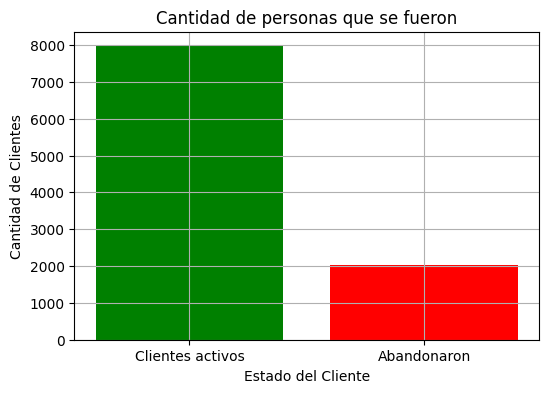

In [6]:
plt.figure(figsize=(6,4))
se_fueron = df["Exited"].value_counts()
plt.bar(["Clientes activos", "Abandonaron"],se_fueron, color=["Green", "red"])
plt.xlabel("Estado del Cliente")
plt.ylabel("Cantidad de Clientes")
plt.title("Cantidad de personas que se fueron")
plt.grid(True)
plt.show()

El gráfico muestra claramente que hay una diferencia significativa entre la cantidad de clientes que permanecieron en el banco y los que lo abandonaron.
La mayoría de los clientes se mantienen, pero un porcentaje del 20% menor a la hipotesis previamente dicha ha decidido irse. Esto indica que el abandono no es un evento aislado pero no es tan grave como se habia pensado, igual es un numero importante por lo que el banco debe investigar más a fondo las razones de esta pérdida y tomar medidas correctivas para mejorar la retención.

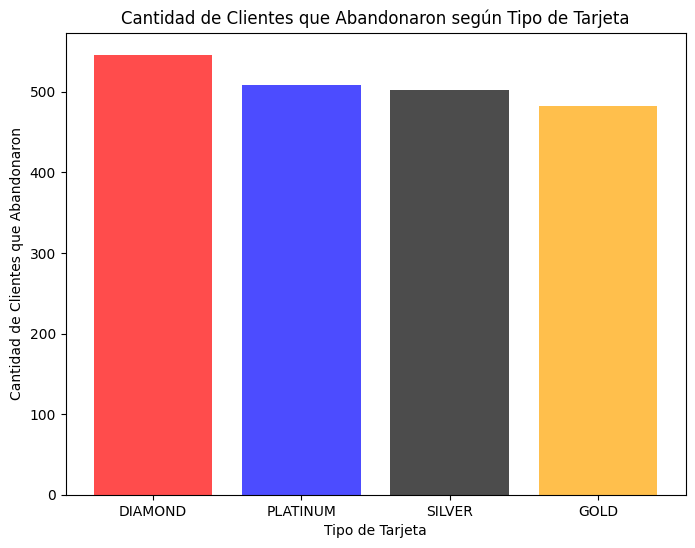

In [7]:
plt.figure(figsize=(8,6))
tarjeta_counts = df[df["Exited"] == 1]["Card Type"].value_counts()
plt.bar(tarjeta_counts.index, tarjeta_counts.values, color=["red", "blue", "black","orange"], alpha=0.7)
plt.xlabel("Tipo de Tarjeta")
plt.ylabel("Cantidad de Clientes que Abandonaron")
plt.title("Cantidad de Clientes que Abandonaron según Tipo de Tarjeta")
plt.show()

El gráfico presentado analiza la relación entre el tipo de tarjeta de crédito y la retención de clientes, evaluando específicamente la cantidad de clientes que abandonaron el banco según la categoría de su tarjeta. La hipótesis inicial sugería que los clientes con tarjetas premium, como DIAMOND o PLATINUM, tendrían una menor tasa de abandono debido a los beneficios y servicios exclusivos asociados a estas categorías. Sin embargo, los datos reflejados en el gráfico contradicen esta hipotesis.

En primer lugar, se observa que las tarjetas DIAMOND y PLATINUM, consideradas como tarjetas premium, presentan una cantidad significativamente mayor de clientes que abandonaron en comparación con las tarjetas de categorías más básicas, como SILVER y GOLD. Esto indica que, contrariamente a lo esperado, la posesión de una tarjeta premium no necesariamente contribuye a una mayor retención de clientes. De hecho, los datos sugieren que los clientes con tarjetas DIAMOND y PLATINUM tienen una mayor propensión a abandonar el banco, lo que podría estar relacionado con factores como expectativas no cumplidas, costos asociados a estas tarjetas o una mayor sensibilidad a la calidad del servicio.

Por otro lado, las tarjetas GOLD y SILVER, que suelen estar asociadas a categorías intermedias o básicas, muestran una menor cantidad de abandonos en comparación con las tarjetas premium. Esto podría indicar que los clientes con estas tarjetas tienen expectativas más alineadas con los servicios recibidos, lo que contribuye a una mayor satisfacción y, en consecuencia, a una menor tasa de abandono.

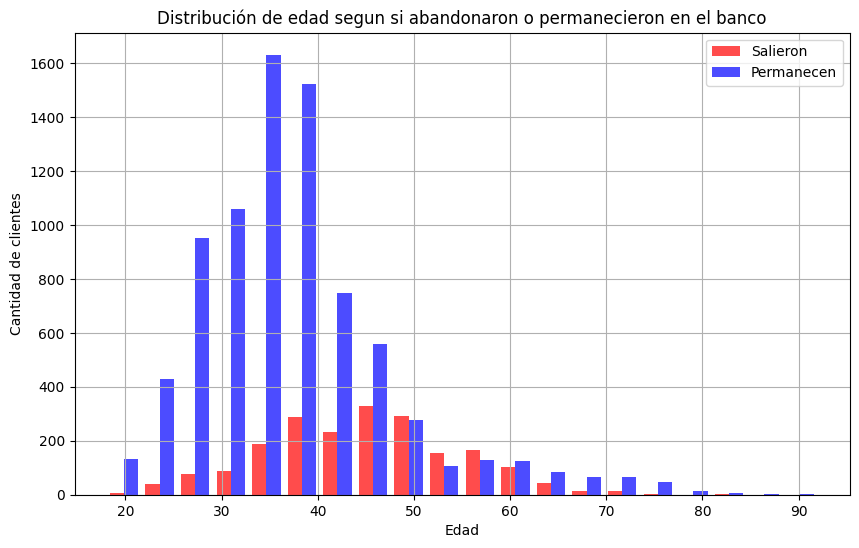

In [11]:

plt.figure(figsize=(10,6))
plt.hist([df[df['Exited'] == 1]['Age'], df[df['Exited'] == 0]['Age']], bins=20, label=['Salieron', 'Permanecen'], color=['red', 'blue'], alpha=0.7)
plt.xlabel("Edad")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución de edad segun si abandonaron o permanecieron en el banco")
plt.legend()
plt.grid(True)
plt.show()


El gráfico analiza la distribución de la edad de los clientes en relación con su decisión de abandonar o permanecer en el banco, lo que permite evaluar si la edad es un factor determinante en la retención de clientes. La hipótesis inicial planteaba que los clientes más jóvenes, específicamente aquellos menores de 30 años, tendrían una mayor probabilidad de abandonar el banco debido a su menor estabilidad financiera y a una mayor disposición a buscar mejores servicios u ofertas en otras instituciones. Sin embargo, los datos presentados en el gráfico contradicen esta suposición, lo que lleva a concluir que la hipótesis inicial es nula.

En primer lugar, se observa que en el grupo de clientes menores de 30 años, la cantidad de aquellos que abandonaron el banco es significativamente menor en comparación con los que decidieron permanecer. Esto sugiere que los clientes más jóvenes no están necesariamente más inclinados a cambiar de banco, lo que podría deberse a factores como la lealtad inicial, la satisfacción con los servicios recibidos o la falta de experiencia en la comparación de ofertas financieras. Por el contrario, en el rango de edad de 50 a 60 años, la tendencia se invierte, mostrando un mayor número de clientes que decidieron abandonar el banco en relación con los que continuaron. Este comportamiento podría estar relacionado con cambios en las necesidades financieras, como la planificación de la jubilación o la búsqueda de productos más adecuados para esta etapa de la vida.

Además, el gráfico revela que no existe una correlación clara y directa entre la edad y la decisión de abandonar el banco. Si bien se observan fluctuaciones en las tasas de abandono en diferentes rangos de edad, estas no siguen un patrón consistente que permita afirmar que la edad es un factor determinante por sí solo. Esto sugiere que otras variables, como la calidad del servicio, las condiciones financieras ofrecidas, la satisfacción del cliente o incluso factores externos como la competencia en el mercado, podrían tener un impacto más significativo en la decisión de permanecer o abandonar la institución financiera.

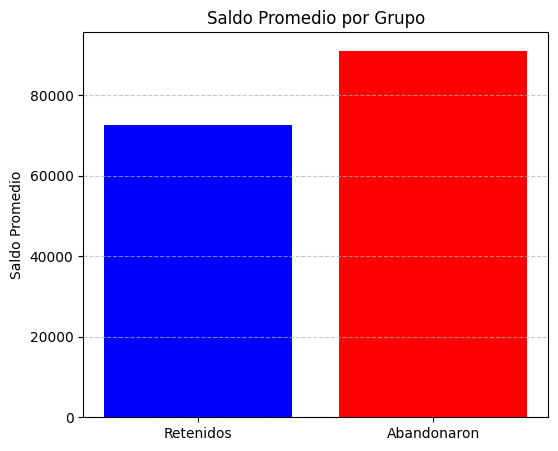

In [19]:
avg_balances = [df[df["Exited"] == 0]["Balance"].mean(), df[df["Exited"] == 1]["Balance"].mean()]
plt.figure(figsize=(6, 5))
plt.bar(["Retenidos", "Abandonaron"], avg_balances, color=['blue', 'red'])
plt.title("Saldo Promedio por Grupo")
plt.ylabel("Saldo Promedio")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

El gráfico presenta un análisis comparativo del saldo promedio entre dos grupos de clientes: aquellos que decidieron permanecer en el banco y aquellos que optaron por abandonarlo. La hipótesis inicial planteaba que los clientes con saldos más altos tendrían una menor probabilidad de abandonar el banco, ya que se asume que estos clientes están más establecidos financieramente y, por lo tanto, más comprometidos con la institución. Sin embargo, los datos reflejados en el gráfico contradicen esta suposición, lo que lleva a cuestionar la validez de la hipótesis.

En primer lugar, se observa que los clientes que decidieron abandonar el banco tenían, en promedio, un saldo significativamente mayor en comparación con aquellos que permanecieron. Este hallazgo es contrario a lo esperado, ya que sugiere que un saldo más alto no necesariamente se traduce en una mayor lealtad o retención. De hecho, los datos indican que los clientes con saldos más elevados pueden estar más dispuestos a buscar alternativas financieras que se ajusten mejor a sus necesidades, incluso si esto implica cambiar de banco. Esto podría deberse a que los clientes con mayores saldos tienen expectativas más altas en términos de servicios, tasas de interés o beneficios, y si estas expectativas no son satisfechas, es más probable que decidan abandonar la institución.

Por otro lado, los clientes que permanecieron en el banco presentaron, en promedio, un saldo más bajo. Esto podría indicar que estos clientes están menos expuestos a las fluctuaciones del mercado o que tienen menos incentivos para buscar alternativas, ya sea por comodidad, satisfacción con los servicios actuales o falta de interés en explorar otras opciones.


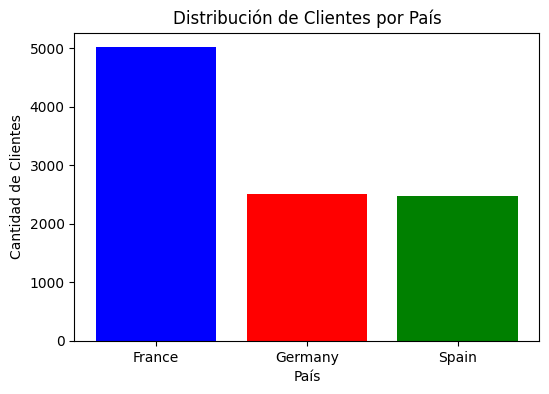

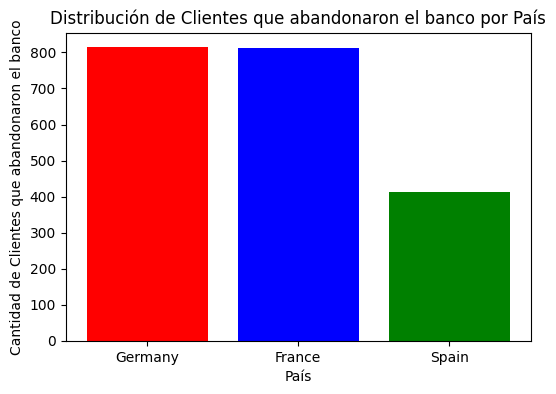

In [35]:
country_counts = df["Geography"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(country_counts.index, country_counts.values, color=["blue", "red", "green"])
plt.xlabel("País")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de Clientes por País")
plt.show()

print()

country_counts_exited = df[df["Exited"] == 1]["Geography"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(country_counts_exited.index, country_counts_exited.values, color=["red", "blue", "green"])
plt.xlabel("País")
plt.ylabel("Cantidad de Clientes que abandonaron el banco")
plt.title("Distribución de Clientes que abandonaron el banco por País")
plt.show()

En la primera gráfica, observamos que Francia es el país con la mayor cantidad de clientes, con más del doble de clientes en comparación con Alemania y España. A primera vista, esto podría llevar a la hipótesis de que, dado su alto número de clientes, Francia también debería ser el país con la mayor cantidad de abandonos. Sin embargo, al observar la segunda gráfica, que representa la cantidad de clientes que dejaron el banco en cada país, se evidencia un patrón interesante: Alemania, a pesar de tener una base de clientes mucho menor que Francia, presenta prácticamente la misma cantidad de clientes que decidieron abandonar la entidad.

Este hallazgo demuestra que el tamaño de la base de clientes en un país no es el único factor determinante en la tasa de abandono. Si el número de abandonos fuera proporcional al número total de clientes, Francia debería liderar con una diferencia considerable. Sin embargo, Alemania muestra una tasa de abandono relativamente alta en comparación con su base de clientes, lo que sugiere que otros factores están influyendo en la decisión de los clientes de dejar el banco.

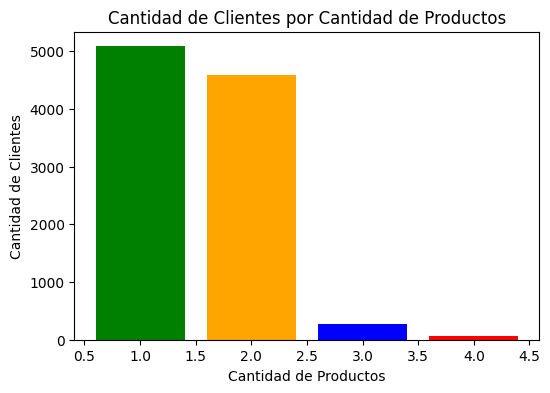

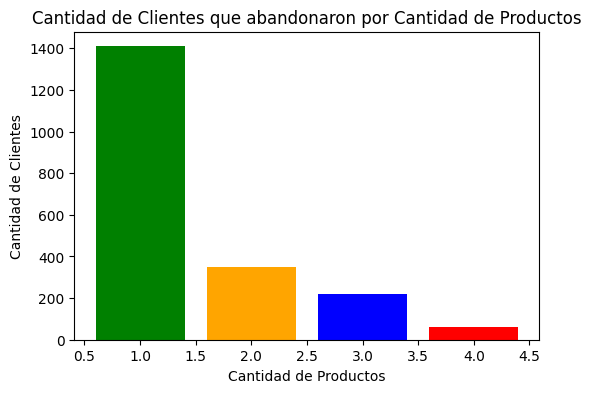

In [51]:
plt.figure(figsize=(6,4))
quantity_of_products = df["NumOfProducts"].value_counts()
plt.bar(quantity_of_products.index, quantity_of_products.values, color=["green", "orange", "blue","red"])
plt.xlabel("Cantidad de Productos")
plt.ylabel("Cantidad de Clientes")
plt.title("Cantidad de Clientes por Cantidad de Productos")
plt.show()

print()

plt.figure(figsize=(6,4))
quantity_of_products_exited = df[df["Exited"] == 1]["NumOfProducts"].value_counts()
plt.bar(quantity_of_products_exited.index, quantity_of_products_exited.values, color=["green", "orange", "blue","red"])
plt.xlabel("Cantidad de Productos")
plt.ylabel("Cantidad de Clientes")
plt.title("Cantidad de Clientes que abandonaron por Cantidad de Productos")
plt.show()

El primer gráfico presenta la distribución de clientes según la cantidad de productos bancarios que poseen. Se observa que la mayoría de los clientes tienen uno o dos productos, mientras que una proporción significativamente menor cuenta con tres o cuatro.

El segundo gráfico muestra la cantidad de clientes que abandonaron el banco en función de la cantidad de productos que tenían. Se evidencia una notable diferencia: la mayoría de los clientes que decidieron dejar la entidad poseían un solo producto, mientras que la tasa de abandono disminuye considerablemente a partir de aquellos que cuentan con dos o más productos. Esto sugiere una correlación entre la cantidad de productos contratados y la retención de clientes, lo que indica que los clientes con un solo producto podrían estar menos comprometidos con la institución o menos satisfechos con los servicios recibidos.